<a href="https://colab.research.google.com/github/R4mu/Statistical_machine_learning/blob/main/Mini_Project_1_b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
def RandExp(lam, N):
    U = np.random.rand(N)
    X = -1/lam*np.log(1-U)
    return X


In [ ]:
def RandDisct(x, p, N):
    cdf = np.cumsum(p)
    U = np.random.rand(N)
    idx = np.searchsorted(cdf, U)
    return x[idx]



In [ ]:
def SSA(Initial, StateChangeMat, FinalTime):
    [m, n] = StateChangeMat.shape
    ReactNum = np.array(range(m))
    AllTimes = {}
    AllStates = {}
    AllStates[0] = Initial
    AllTimes[0] = 0
    k = 0
    t = 0
    State = Initial

    while True:
        w = PropensityFunc(State, m)
        a = np.sum(w)
        tau = RandExp(a, 1)
        t = t + tau

        if t > FinalTime:
            break

        which = RandDisct(ReactNum, w/a, 1)
        State = State + StateChangeMat[which.item(),]
        k += 1
        AllTimes[k] = t
        AllStates[k] = State

    return AllTimes, AllStates



In [ ]:
# Define parameters
# Constant rates
alpha_A, alpha_A_prime, alpha_R, alpha_R_prime, beta_A, beta_R, delta_MA, delta_MR, delta_A, delta_R, gamma_A, gamma_R, gamma_C, theta_A, theta_R = 50.0, 500.0, 0.01, 50.0, 50.0, 5.0, 10.0, 0.5, 1.0, 0.2, 1.0, 1.0, 2.0, 50.0, 100.0

# Define initial conditions [DA, DA', DR, DR', MA, MR, A, R, C]
Initial = np.array([1, 0, 1, 0, 0, 0, 0, 0, 0])

# Define state change matrix for the 16 reactions
StateChangeMat = np.array([
    [0, 0, 0, 0, 0, 0, -1, -1, 1],  # A + R -> C
    [0, 0, 0, 0, 0, 0, -1, 0, 0],     # A -> ∅
    [0, 0, 0, 0, 0, 0, 0, 1, -1],     # C -> R
    [0, 0, 0, 0, 0, 0, 0, -1, 0],     # R -> ∅
    [-1, 1, 0, 0, 0, 0, -1, 0, 0],    # DA + A -> DA'
    [0, 0, -1, 1, 0, 0, -1, 0, 0],    # DR + A -> DR'
    [1, -1, 0, 0, 0, 0, 1, 0, 0],     # DA' -> DA + A
    [0, 0, 0, 0, 1, 0, 0, 0, 0],      # DA -> DA + MA
    [0, 0, 0, 0, 1, 0, 0, 0, 0],      # DA' -> DA' + MA
    [0, 0, 0, 0, -1, 0, 0, 0, 0],     # MA -> ∅
    [0, 0, 0, 0, 0, 0, 1, 0, 0],      # MA -> MA + A
    [0, 0, 1, -1, 0, 0, 1, 0, 0],     # DR' -> DR + A
    [0, 0, 0, 0, 0, 1, 0, 0, 0],      # DR -> DR + MR
    [0, 0, 0, 0, 0, 1, 0, 0, 0],      # DR' -> DR' + MR
    [0, 0, 0, 0, 0, -1, 0, 0, 0],     # MR -> ∅
    [0, 0, 0, 0, 0, 0, 0, 1, 0]       # MR -> MR + R
])



In [ ]:
# Propensity functions (for predator-prey model)
def PropensityFunc(State, ReactNo):
    # ReactNo: number of reactions
    w = np.zeros(ReactNo)

    # State variables: [DA, DA', DR, DR', MA, MR, A, R, C]
    DA, DAp, DR, DRp, MA, MR, A, R, C = State


    w[0] = gamma_C * A * R      # A + R -> C
    w[1] = delta_A * A          # A -> ∅
    w[2] = delta_A * C          # C -> R
    w[3] = delta_R * R          # R -> ∅
    w[4] = gamma_A * DA * A     # DA + A -> DA'
    w[5] = gamma_R * DR * A     # DR + A -> DR'
    w[6] = theta_A * DAp        # DA' -> DA + A
    w[7] = alpha_A * DA         # DA -> DA + MA
    w[8] = alpha_A_prime * DAp  # DA' -> DA' + MA
    w[9] = delta_MA * MA        # MA -> ∅
    w[10] = beta_A * MA         # MA -> MA + A
    w[11] = theta_R * DRp       # DR' -> DR + A
    w[12] = alpha_R * DR        # DR -> DR + MR
    w[13] = alpha_R_prime * DRp # DR' -> DR' + MR
    w[14] = delta_MR * MR       # MR -> ∅
    w[15] = beta_R * MR         # MR -> MR + R

    return w



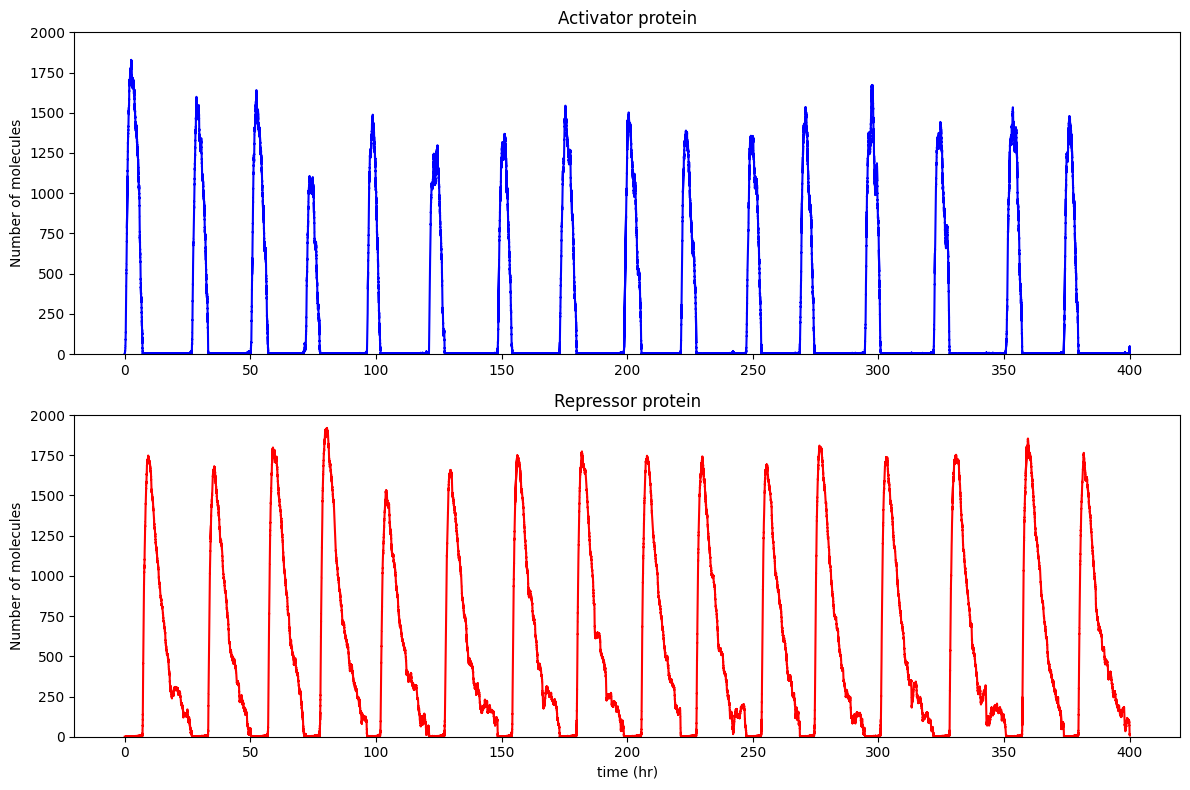

In [ ]:
# Run simulation
FinalTime = 400
Times, States = SSA(Initial, StateChangeMat, FinalTime)

# Extract A and R protein numbers
n = len(Times)
t = [Times[i] if i == 0 else Times[i][0] for i in range(n)]
A = [States[i][6] for i in range(n)]  # A is at index 6
R = [States[i][7] for i in range(n)]  # R is at index 7

# Plot results
plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
plt.plot(t, A, 'b-', label='Activator (A)')
plt.ylabel('Number of molecules')
plt.title('Activator protein')
plt.ylim(0, 2000)

plt.subplot(2, 1, 2)
plt.plot(t, R, 'r-', label='Repressor (R)')
plt.xlabel('time (hr)')
plt.ylabel('Number of molecules')
plt.title('Repressor protein')
plt.ylim(0, 2000)

plt.tight_layout()
plt.show()